# TP3 :  régression linéaire

In [107]:
import  numpy as np #charger les bibliothèque

import matplotlib.pyplot as plt

la taille de notre échantillon est : (50,)


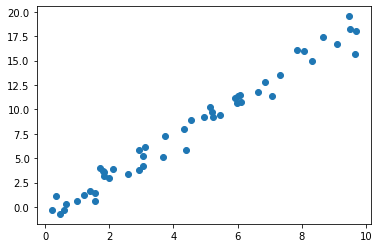

In [108]:
# un exemple simple x réel et y aussi 

rng = np.random.RandomState(42) #pour générer les mêmes données

#constituer  un exmple de points aléatoires  
x = 10 * rng.rand(50) #genere un tbl de 50
print('la taille de notre échantillon est :',x.shape)

y=2*x-1 + rng.randn(50) # définir une relation entre x et y + bruit 

#afficher data y=f(x) [y en fonction de x]  comme un nuage de points 
plt.scatter(x, y);
#observation(x,y), i = 1 ... 50
y = a*x + b

## Y-a-t-il une relation entre $x$ et $y$ : trouver $f$ tel que  $y=f(x)$ ? 

Pour répondre à cette question, nous allons supposer que $f$ est une fonction affine de la forme : 

$$f(x)=a*x+b$$

avec $a$ et $b$ sont des inconnus (réels) à déterminer. 

On connaît $(x_i,y_i)$ pour  $i=1 \ldots 50$

Et la relation $y_i=a*x_i + b,$ pour  $i=1 \ldots 50$ 

qui forme un système linéaire facile à résoudre (plus de données que d'inconnus)

Pour résumer : le but est de trouver la droite "la plus proche" de l'ensemble (nuage) de points. Un bon critère pour vérifier "la plus proche" est minimiser l'erreur quadratique moyenne : 

$$\frac{1}{n} \sum_{i=1}^{n}(y_i - a*x_i -b)^2$$

Après calcul on trouve les valeurs optimales : 

$\hat{a}=\frac{\sigma_{xy}}{\sigma_{x}^2}$ et  $\hat{b}=\bar{y_n}-\bar{x_n}*\frac{\sigma_{xy}}{\sigma_{x}^2}$ avec : 


- $\bar{y_n}= \frac{1}{n} \sum_{i=1}^{n} y_i$

- $\bar{x_n}= \frac{1}{n} \sum_{i=1}^{n} x_i$

- $\sigma_{y}= \frac{1}{n} \sum_{i=1}^{n} (y_i-\bar{y_n})^2$

- $\sigma_{x}= \frac{1}{n} \sum_{i=1}^{n} (x_i-\bar{x_n})^2$

- $\sigma_{xy}= \frac{1}{n} \sum_{i=1}^{n} (x_i-\bar{x_n})(y_i-\bar{y_n})$

Au lieu de faire le calcul à la main, nous allons utiliser des bibliothèques python pour trouver la solution. 

### Exemple1 : Formulation avec la biblio sklearn


In [109]:
# On peut résoudre ce problème de régression linéaire avec sklearn 
# on choisit et on charge le modèle 
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
print('la tailles des entrées est :',X.shape)

models = LinearRegression(fit_intercept=True)
models.fit(X, y)

la tailles des entrées est : (50, 1)


LinearRegression()

In [110]:
a=models.coef_
print('-'*5,'la solution','-'*5)
print('la valeur trouvée de a est : ', a[0]) # = 2 de base

b=models.intercept_
print('la valeur trouvée de b est : ', b) # = -1 de base

----- la solution -----
la valeur trouvée de a est :  1.9776566003853122
la valeur trouvée de b est :  -0.9033107255311235


Si maintenat on a un nouveau $xnew=2.5$ qui est différent de tous les $x_i$ observés on peut trouver son image $ynew$ avec la relation :  $$ynew=a*xnew+b$$

In [111]:
#solution pour un seul point
xnew=np.array([2.50])
ynew = models.predict(xnew.reshape(-1, 1))
print(ynew)

[4.04083078]


On peut aussi appliquer la même méthode sur xnew comme tableau de valeurs au lieu d'un seul scalaire


In [112]:
#solution pour un tableau de points
xnew=np.linspace(-1,12,10)
#s'assurer d'avoir le bon format 
xnew=xnew[:, np.newaxis]

ynew = models.predict(xnew)
print(ynew)

[-2.88096733 -0.02435224  2.83226285  5.68887794  8.54549303 11.40210812
 14.25872321 17.1153383  19.97195339 22.82856848]


Vérification visuelle


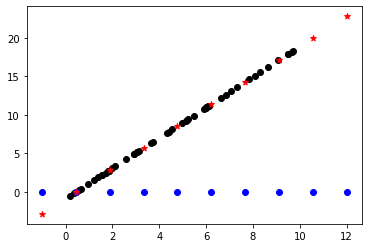

In [113]:
plt.scatter(x, y,color='k');# données apprentissage en noir 
plt.scatter(xnew, np.zeros(xnew.shape[0]),color='b');# x_i non observés en bleu
plt.scatter(xnew, ynew,color='r', marker='*');# y_i prédit ave la régression linéaire (x_i,y_i) en rouge 

(50,)
Biais ou erreur en chaque point : 



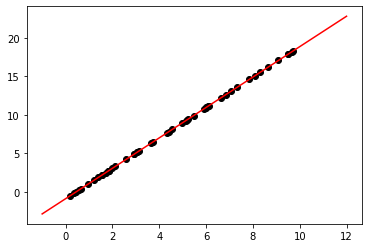

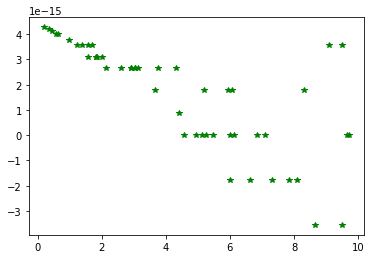

L'erreur globale peut être donnée l'erreur quadratique moyenne :  6.893473346225456e-30


In [114]:
#on peut aussi afficher la fonction f
plt.scatter(x, y,color='k');
#plt.scatter(xnew, ynew);
plt.plot(xnew, ynew,'r');
#l'erreur est donnée par la somme cumulée des distances 
#entre les points en noir et la droite en rouge

ypred=models.predict(X)
print(ypred.shape)
print('Biais ou erreur en chaque point : \n')
plt.figure()
plt.plot(x, (y-ypred), 'g*')
plt.show()
print('L\'erreur globale peut être donnée l\'erreur quadratique moyenne : ',np.mean((y-ypred)**2))

## Nous venons de faire notre premier exemple pour le cas simple $ x$ réel et  $y$ réel   


On peut généraliser ce résultat quelque soit la taille de $x :  x\in R^d$ et pour toute dimension finie $d$

Exemple : 

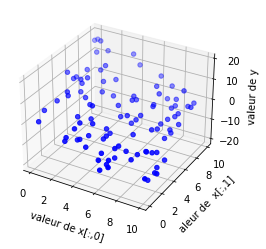

In [115]:
from mpl_toolkits.mplot3d import Axes3D
#constituer  un exmple de data 
x = np.array(10 * rng.rand(100,2))
y=2*np.inner(np.array([-1,1]), x)+ 2*rng.randn(x.shape[0]) 

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1],y,c='b', marker='o');
ax.set_xlabel('valeur de x[:,0]')
ax.set_ylabel('aleur de  x[:,1]')
ax.set_zlabel('valeur de y ')

plt.show()

In [116]:
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

LinearRegression()

In [117]:
xnew = np.array(10 * rng.rand(1000,2))
ynew = model.predict(xnew)

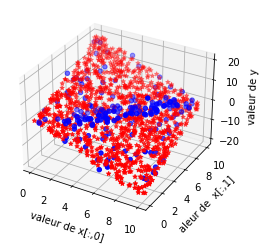

In [118]:
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1],y,c='b', marker='o');
ax.scatter(x[:,0], x[:,1],-y,c='b', marker='o');
ax.set_xlabel('valeur de x[:,0]')
ax.set_ylabel('aleur de  x[:,1]')
ax.set_zlabel('valeur de y ')

ax.scatter(xnew[:,0], xnew[:,1],ynew,c='r', marker='*');

plt.show()

### Exercice TD2 : 
Reprendre l'exercice de la régression linéaire dans le TD2.

1- Faire un programme python qui répond aux questions.

2- Comparer les résultats théoriques vu en TD et les résultats par le code. 

3- Prédire le taux de scolarisation pour des PIBs non observés.

4- Suivre les mêmes étapes que l'exemple 1 au dessus pour visualiser et inerpréter le biais. 

5- Commenter la qualité du modèles : bon ou mauvais ? Pourquoi ? 

In [147]:
pib = np.array([8802,5872,4775,5680,7964,5680,3072,1942])
scol = np.array([83,69,63,62,81,62,56,50])
print("moyenne PIB : ", pib.mean(), "moyenne scolarisation :", scol.mean())
print("variance PIB : ", pib.std(), "variance scolarisation :", scol.std())

print(pib.shape)
print(scol.shape)
models = LinearRegression(fit_intercept=True)
models.fit(pib[:, np.newaxis], scol)

a=models.coef_
print('-'*5,'la solution', '-'*5)
print('la valeur trouvé est', a)

b=models.intercept_
print('la valeur trouvée de b est :', b)

cov = np.sum(pib * scol) -len(pib) * (pib.mean() * scol.mean()) / (len(pib) - 1)
print('la covarience :', cov)

a_chap = cov /pib.std()
b_chap = scol.mean() - a_chap * pib.mean()

print("â =", a_chap, "b^ =", b_chap)

moyenne PIB :  5473.375 moyenne scolarisation : 65.75
variance PIB :  2128.73747427319 variance scolarisation : 10.720890821195784
(8,)
(8,)
----- la solution -----
la valeur trouvé est [0.00485763]
la valeur trouvée de b est : 39.16236270608056
la covarience : 2643809.964285714
â = 1241.9614894919741 b^ = -6797655.217548134


###  Un test de la régression logistique  sur des données réelles
## C'est un cas particulier où $y \in \{0, \ldots, k\}$

In [148]:
#importer les bibliothèques 
#pour l'affichage (si déjà fait pour np, plt) 
%matplotlib inline 

#charger des datasest de sklearn
from sklearn import datasets

In [149]:
#charger la base iris 
iris = datasets.load_iris()
#vérifier le type de la variable iris 
print(type(iris))
#vérifier le type de données 
print(type(iris.data))
#vérifier les dimensions 
print(iris.data.shape)

#Sur wikipédia chercher la signification de ces données 

<class 'sklearn.utils._bunch.Bunch'>
<class 'numpy.ndarray'>
(150, 4)


In [122]:
X = iris.data[:, :2] # Utiliser les deux premières colonnes afin d'avoir un problème de classification binaire.

print(np.unique(iris.target))
#on va garder deux classes seulement pour un test simple
y = (iris.target != 0) * 1 # re-étiquetage des fleurs
print(X.shape)
print(np.unique(y))

[0 1 2]
(150, 2)
[0 1]


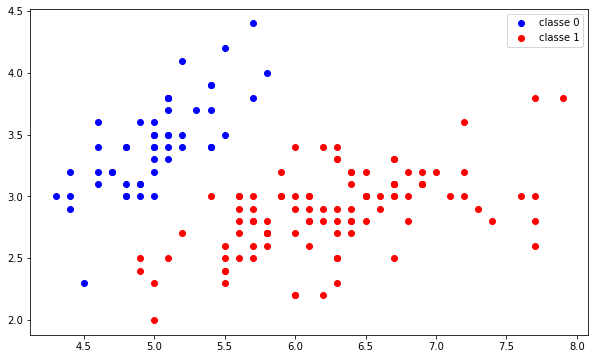

In [123]:
#visualidata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlMAAAFnCAYAAACCQszOAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAAng0lEQVR4nO3df5Ac5X3n8c9XszrLmzjGhs2FY61dXHLFCLErWwsClGAbCeJgF6riR8x5Ayhl15KVcxCTc5ycUilHRqGoonzBl0j2AnVAtBcLKQmnGF+Ikey7lKuisGtLRIpyMb9WiHCHWIINt8bWj+/90bPa3dHM7kz3TPc83e9X1dRsP9M9z9NP97S+6nnm+Zq7CwAAAPEsyroBAAAAISOYAgAASIBgCgAAIAGCKQAAgAQIpgAAABIgmAIAAEig7mDKzEpm9j0z+3qV1zaY2TEz219+fLq5zQQAAGhPHQ2se4ekw5J+psbrO9z9N5I3CQAAIBx1BVNm1i3pY5K2SLqzGRWfc8453tvb24y3AgAAaKnx8fFX3b2r2mv13pn6I0m/Lekd86xzvZldIemfJX3W3V+c7w17e3s1NjZWZ/UAAADZMbOJWq8tOGbKzD4u6RV3H59ntb+S1OvufZK+KenhGu81ZGZjZjZ27NixhaoGAABoe/UMQF8j6Voze0HS1yRdaWbbZ6/g7pPu/uPy4gOSVlV7I3cfcfcBdx/o6qp6pwwAACAoCwZT7v677t7t7r2SbpK0191/dfY6ZnburMVrFQ1UBwAAyL1Gfs03h5ltljTm7rsl3W5m10o6Iek1SRua0zwAAJDU8ePHdfToUb311ltZN6XtLVmyRN3d3Vq8eHHd25i7t7BJtQ0MDDgD0AEAaL3nn39e73jHO3T22WfLzLJuTttyd01OTuqNN97Q+eefP+c1Mxt394Fq2zEDOgAAOffWW28RSNXBzHT22Wc3fAePYAoAgAIgkKpPnH4imAIAAJn4whe+oHvvvTfVOp9//nmtXr1ay5Yt0yc+8Qn95Cc/SfyeBFMAAKAwPv/5z+uzn/2snnnmGb3rXe/Sgw8+mPg9CaaAghgdlXp7pUWLoufR0axbBKBdteJ68cgjj6ivr0/9/f26+eabz3j9/vvv18UXX6z+/n5df/31mpqakiTt3LlTK1asUH9/v6644gpJ0qFDh3TJJZdo5cqV6uvr0/e//31J0vbt20+X33bbbTp58uScOtxde/fu1Q033CBJuvXWW/XYY48l3jeCKaAARkeloSFpYkJyj56HhgioAJypFdeLQ4cO6a677tLevXt14MAB3XfffWesc9111+mpp57SgQMHdMEFF5y+Y7R582Y98cQTOnDggHbv3i1J+spXvqI77rhD+/fv19jYmLq7u3X48GHt2LFD3/nOd7R//36VSiWNVjR6cnJSZ511ljo6opmhuru79dJLL8XfsTKCKaAANm2Syv/JO21qKioHgNlacb3Yu3evbrzxRp1zzjmSpHe/+91nrHPw4EH94i/+oi666CKNjo7q0KFDkqQ1a9Zow4YNuv/++0/fabrsssv0h3/4h7rnnns0MTGht7/97dqzZ4/Gx8d18cUXa+XKldqzZ4+ee+65+I1uQOxJOwGE48iRxsoBFFdW14sNGzboscceU39/vx566CF9+9vflhTdhdq3b58ef/xxrVq1SuPj4/rkJz+p1atX6/HHH9c111yjr371q3J33Xrrrbr77rtr1nH22Wfr9ddf14kTJ9TR0aGjR4/qvPPOS9x27kwBBbB0aWPlAIqrFdeLK6+8Ujt37tTk5KQk6bXXXjtjnTfeeEPnnnuujh8/PufruWeffVarV6/W5s2b1dXVpRdffFHPPfec3vve9+r222/X+vXr9fTTT2vt2rXatWuXXnnlldN1TExMzKnDzPSRj3xEu3btkiQ9/PDDWr9+ffwdKyOYAgpgyxaps3NuWWdnVA4As7XienHhhRdq06ZN+tCHPqT+/n7deeedZ6zzxS9+UatXr9aaNWv0/ve//3T55z73OV100UVasWKFLr/8cvX39+vRRx/VihUrtHLlSh08eFC33HKLli9frrvuuktXX321+vr6dNVVV+nll18+o5577rlHX/rSl7Rs2TJNTk7qU5/6VPwdKyOdDFAQo6PRmIcjR6L/YW7ZIg0OZt0qAGk4fPiwLrjggrrXL/r1olp/zZdOhjFTQEEMDhbrYgggPq4XjeFrPgAAgAQIpgAAABIgmAIAAEiAYAoAACABgikAAIAECKYAAEAmvvCFL+jee+9Ntc4//uM/1rJly2RmevXVV5vyngRTAACgMNasWaMnn3xSPT09TXtPgikAADDX6KjU2ystWhQ9z0rvEtcjjzyivr4+9ff36+abbz7j9fvvv18XX3yx+vv7df3112uqnG15586dWrFihfr7+3XFFVdIkg4dOqRLLrlEK1euVF9fn77//e9LkrZv3366/LbbbjudGHm2D3zgA+rt7U28P7MRTAEAgBmjo9LQkDQxIblHz0NDiQKqQ4cO6a677tLevXt14MAB3XfffWesc9111+mpp57SgQMHdMEFF+jBBx+UJG3evFlPPPGEDhw4oN27d0uKkh/fcccd2r9/v8bGxtTd3a3Dhw9rx44d+s53vqP9+/erVCrNyfHXSsyADgAAZmzaJJXvCp02NRWVx5wWfe/evbrxxht1zjnnSJLe/e53n7HOwYMH9Xu/93t6/fXX9eabb+qXfumXJEVfy23YsEG/8iu/ouuuu06SdNlll2nLli06evSorrvuOr3vfe/Tnj17ND4+rosvvliS9KMf/Ug/+7M/G6u9jSKYAgAAM44caay8STZs2KDHHntM/f39euihh/Ttb39bUnQXat++fXr88ce1atUqjY+P65Of/KRWr16txx9/XNdcc42++tWvyt1166236u67725pO6vhaz4AADBj6dLGyutw5ZVXaufOnZqcnJQkvfbaa2es88Ybb+jcc8/V8ePH53w99+yzz2r16tXavHmzurq69OKLL+q5557Te9/7Xt1+++1av369nn76aa1du1a7du3SK6+8crqOiYmJ2G1uBMEUAACYsWWL1Nk5t6yzMyqP6cILL9SmTZv0oQ99SP39/brzzjvPWOeLX/yiVq9erTVr1uj973//6fLPfe5zuuiii7RixQpdfvnl6u/v16OPPqoVK1Zo5cqVOnjwoG655RYtX75cd911l66++mr19fXpqquu0ssvv3xGPV/+8pfV3d2to0ePqq+vT5/+9Kdj79c0c/fEbxLHwMCAj42NZVI3AABFcvjwYV1wwQX1bzA6Go2ROnIkuiO1ZUvs8VIhqtZfZjbu7gPV1mfMFAAAmGtwsFDBU1J8zQcAAJAAwRQAAEACBFNARlowwTAA1JTVGOnQxOkngikgAy2YYBgAalqyZIkmJycJqBbg7pqcnNSSJUsa2o5f8wEZ6O2NAqhKPT3SCy+k3RoAeXf8+HEdPXpUb731VtZNaXtLlixRd3e3Fi9ePKecX/MBbSajCYYBFNTixYt1/vnnZ92M3OJrPiADLZhgGACQEYIpIAMtmGAYAJARgikgA4OD0shINEbKLHoeGWGOPAAIEWOmgIwwwTAA5AN3pgAAABIgmAIAAEiAYAoAACABgikAAIAECKYAAAASIJhCrpA8GACQNqZGQG5MJw+emoqWp5MHS0xBAABoHe5MITc2bZoJpKZNTUXlAAC0CsEUcoPkwQCALBBMITdIHgwAyALBFHKD5MEAgCwQTCE3SB4MAMgCv+ZDrpA8GACQNu5MAQAAJEAwBQAAkADBFAAAQAJ1B1NmVjKz75nZ16u89jYz22Fmz5jZPjPrbWorAQAA2lQjd6bukHS4xmufkvSv7r5M0n+WdE/ShgFoD+Q7BID51RVMmVm3pI9JeqDGKuslPVz+e5ektWZmyZsHIEvT+Q4nJiT3mXyHBFQAMKPeO1N/JOm3JZ2q8fp5kl6UJHc/IekHks5O2jgA2SLfIQAsbMFgysw+LukVdx9PWpmZDZnZmJmNHTt2LOnbAWgx8h0CwMLquTO1RtK1ZvaCpK9JutLMtles85Kk90iSmXVIeqekyco3cvcRdx9w94Gurq5EDQfQeuQ7BICFLRhMufvvunu3u/dKuknSXnf/1YrVdku6tfz3DeV1vKktBZA68h0CwMJizzNlZpvN7Nry4oOSzjazZyTdKel3mtE4ANki3yEALMyyuoE0MDDgY2NjmdQNAADQCDMbd/eBaq8xAzoAAEACBFMAAAAJEEwBAAAkQDAFAACQAMEUkNDGjVJHR/Rrt46OaBkAUBwdWTcACNnGjdK2bTPLJ0/OLG/dmk2bAADp4s4UkMDISGPlAID8IZgCEjh5srFyAED+EEwBCZRKjZUDAPKHYApIYGiosXIAQP4wAB1IYHqQ+chI9NVeqRQFUgw+B4DiIJgCEtq6leAJAIqMr/kAAAASIJgCAABIgGAKAAAgAYIpAACABAimAAAAEiCYQltaty5KHDz9WLcu6xaFb3RU6u2VFi2KnkdHs24RgNxJ+0LTJhc2gim0nXXrpD175pbt2UNAlcToaDT/1cSE5B49Dw0RUAFoorQvNG10YTN3T71SSRoYGPCxsbFM6kZ7M6v9Wkana/B6e6PrTKWeHumFF9JuDYBcSvtCk3J9Zjbu7gPVXuPOFFAAR440Vg4ADUv7QtNGFzaCKaAAli5trBwAGpb2haaNLmwEU2g7a9c2Vo6FbdkidXbOLevsjMoBoCnSvtC00YWNYApt58knzwyc1q6NyhHP4GCUjLmnJxqT1tMTLQ8OZt0yALmR9oWmjS5sDEAHAABYAAPQAQAAWoRgCgAAIAGCKQAAgAQIpgAAABIgmEJbCim9U5ukhgIAZKQj6wYAlabTLU1NRcvT6Zak1vziNUl9abcVANB+mBoBbSek9E7kvAOAYmBqBAQlpPRObZQaCgCQEYIptJ2Q0ju1UWooAEBGCKbQdkJK79RGqaEAABkhmELbCSm9UxulhgIAZIQB6AAAAAtgADoAAECLEEwBAAAkQDAFAACQAMEUAABAAgRTGQslr1vcdoayfwBQNy5sqEBuvgyFktctbjtD2T8AqBsXNlTB1AgZCiWvW9x2hrJ/AFA3LmyFNd/UCARTGVq0SKrW/WbSqVPpt6eWuO0MZf8AoG5c2AqLeabaVCh53eK2M5T9A4C6cWFDFQRTGQolr1vcdoayfwBQNy5sqIJgKkOh5HWL285Q9g8A6saFDVUwZgoAAGABjJkCAABoEYIpAACABAimAAAAEiCYAgAASGDBYMrMlpjZ35vZATM7ZGZ/UGWdDWZ2zMz2lx+fbk1zAQAA2ks9d6Z+LOlKd++XtFLSR83s0irr7XD3leXHA81sJMK1caPU0RH9grijI1pu5XYh5R8Nqa0AgNoWTHTs0dwJb5YXF5cf2cyngKBs3Cht2zazfPLkzPLWrc3fLqT8oyG1FQAwv7rmmTKzkqRxScsk/Ym7f77i9Q2S7pZ0TNI/S/qsu78433syz1T+dXREgVClUkk6caL524WUfzSktgIAmjDPlLufdPeVkrolXWJmKypW+StJve7eJ+mbkh6u0ZAhMxszs7Fjx47VvQMIU7WAaL7ypNsdOdJYeZZCaisAYH4N/ZrP3V+X9C1JH60on3T3H5cXH5C0qsb2I+4+4O4DXV1dMZqLkJRKjZUn3S6k/KMhtRUAML96fs3XZWZnlf9+u6SrJP1TxTrnzlq8VtLhJrYRgZoeA1RvedLtQso/GlJbAQDzq+fO1LmSvmVmT0t6StI33f3rZrbZzK4tr3N7edqEA5Jul7ShNc1FSLZulYaHZ+4olUrR8nyDyJNsF1L+0ZDaCgCYH4mOAQAAFkCiYwAAgBYhmAIAAEiAYAoAACABgikAAIAECKYylnZ+trg579KuL26/ZJHvLu0+zb20D2JIJxuA9uTumTxWrVrlRbd9u3tnp7s08+jsjMpbYXh4bl3Tj+Hh9qovbr+k3Z/u6fdp7qV9EEM62QBkStKY14hpmBohQ2nnZ4ub8y7t+uL2Sxb57tLu09xL+yCGdLIByNR8UyMQTGVo0aLov7SVzKRTp5pfn1nt11pxGsStL26/pN2f0+9dS0YfrbClfRBDOtkAZIp5ptpU2vnZ4ua8S7u+uP2SRb67tPs099I+iCGdbADaFsFUhtLOzxY3513a9cXtlyzy3aXdp7mX9kEM6WQD0L5qDaZq9YMB6JHt2917etzNoudWj18dHnYvlaLxsqVS6wdKx60vbr+k3Z/u6fdp7qV9EEM62QBkRgxABwAAiI8xUwAAAC1CMAUAAJAAwRQAAEACBFMAAAAJEEyhpUh7htwqQlLGIuwj0AQdWTcA+TU6Gs23NDUVLU9MzMy/NDjY/O2A1GzcKG3bNrN88uTM8tat2bSp2Yqwj0CTMDUCWoa0Z8itIiRlLMI+Ag1gagRk4siRxsqTbgekplqQMV95iIqwj0CTEEyhZUh7htwqQlLGIuwj0CQEU2gZ0p4ht4qQlLEI+wg0CcEUWmZwUBoZicY6mUXPIyMLDyKPux2Qmq1bpeHhmbs0pVK0nKeB2UXYR6BJGIAOAACwAAagAwAAtAjBFAAAQAIEUwAAAAkQTAEAACRAMAUAAJAAwVSFtBPsxq0vlPyjJCwuMA5+dUk+vKH0adoZzkO5cCO/3D2Tx6pVq7zdbN/u3tnpLs08Ojuj8naqb3h47jbTj+Hh1rQzrrT7E22Eg19dkg9vKH0at51pbxdXKMcBTSdpzGvENMwzNUvaCXbj1hdK/lESFhcYB7+6JB/eUPo07QznoVy4Ebz55pkimJpl0aLovxmVzKRTp9qnPrPar2V0OKtKuz/RRjj41SX58IbSp3HbmfZ2cYVyHNB0TNpZp7QT7MatL5T8oyQsLjAOfnVJPryh9GnaGc5DuXAj1wimZkk7wW7c+kLJP0rC4gLj4FeX5MMbSp+mneE8lAs38q3WYKpWP9pxALp7NIawp8fdLHpu9ZjCuPUND7uXStHYx1Kp/QafT0u7P9FGOPjVJfnwhtKncduZ9nZxhXIc0FRiADoAAEB8jJkCAABoEYIpAACABAimAAAAEiCYAgAASIBgKmOhpJQKJRcg0PZCyuu2bl30oZ9+rFuXr/qAJiGYytDoaDS9zMRENKHuxES03Kpra9z6Nm6Utm2byYJx8mS0TEAFNCjtD30S69ZJe/bMLduzp3UBTtr1AU3E1AgZCiWlVCi5AIG2F1Jet7TzVoWSJwuFxdQIberIkcbKs6qvWiA1XzmAGtL+0ANIBcFUhkJJKRVKLkCg7ZHXDcglgqkMhZJSKpRcgEDbCymv29q1jZWHVh/QRARTGRoclEZGouESZtHzyEhU3k71bd0qDQ/P3IkqlaLlrVtb004gt9L+0Cfx5JNnBjJr10bleagPaCIGoAMAACyAAegAAAAtQjAFAACQAMEUAABAAgRTAAAACSwYTJnZEjP7ezM7YGaHzOwPqqzzNjPbYWbPmNk+M+ttSWsbEDf9VUhps+KIm2OP/pxH2juZ9kGMK+12FiGBZNzcdWn3aSgffC5stdE3jXH3eR+STNJPl/9eLGmfpEsr1tko6Svlv2+StGOh9121apW3yvbt7p2d7lEOgujR2RmVt2K7UAwPz9236cfw8Pzb0Z/zSHsn0z6IobQzbn0hWbu2+j6uXTv/dmn3aSgffC5stdE3VUka81qxUq0Xqq4sdUr6rqTVFeVPSLqs/HeHpFdVnnah1qOVwVRPT/VrQE9Pa7YLRalUff9Kpfm3oz/nkfZOpn0QQ2ln3PpCUm3/ph/zSbtPQ/ngc2Grjb6par5gqq55psysJGlc0jJJf+Lun694/aCkj7r70fLys+WA69WK9YYkDUnS0qVLV01US/jZBIsWRUewkpl06lTztwtF3Dyi9Oc80t7JtA9iXGm3swhJckPp01A++FzYaqNvqko8z5S7n3T3lZK6JV1iZiviNMTdR9x9wN0Hurq64rxFXeKmv8p72qy4Ofboz3mkvZNpH8S40m4nCSRrS7tPQ/ngc2Grjb5pWEO/5nP31yV9S9JHK156SdJ7JMnMOiS9U9JkE9oXS9z0VyGlzYojbo49+nMeae9k2gcxrrTbWYQEknFz16Xdp6F88Lmw1UbfNK7W93/TD0ldks4q//12SX8r6eMV63xGcwegP7rQ+7ZyzJR7NN6tp8fdLHqud/xb3O1CMTw8MxSiVKp/fC79OY+0dzLtgxhX2u2MW19IKgehLzT4fFrafRrKB58LW230zRmUZMyUmfVJelhSSdGdrEfdfbOZbS6/8W4zWyLpTyV9QNJrkm5y9+fme19y8wEAgFDMN2aqY6GN3f1pRUFSZfnvz/r7LUk3JmkkAABAiJgBHQAAIAGCKQAAgAQIpgAAABIgmAIAAEiAYKpCUXM0IiB5T0Ca9v6Fsl0SoRz7vOM45FetORNa/Wj1PFNx5DxHI/Ig7wlI096/ULZLIpRjn3cch+ApaW6+VmjHeaZ6e6Vq6QJ7eqQXXki7NUAVcU/SUE7utPcvlO2SCOXY5x3HIXjzzTNFMDVLznM0Ig/ynoA07f0LZbskQjn2ecdxCF7iRMdFUeAcjQhF3hOQpr1/oWyXRCjHPu84DrlGMDVLkXM0IhB5T0Ca9v6Fsl0SoRz7vOM45FutwVStfrTjAHT3XOdoRF7kPQFp2vsXynZJhHLs847jEDQxAB0AACA+xkwBAAC0CMEUAABAAgRTAAAACRBMAQAAJEAwBYQmbn6vjRuljo5oksCOjmi5lfWlLe39S/s4JKkzbaG0MxQh9WdIbW2mWj/za/WjXadGANpa3Pxew8Nzt5l+DA+3pr60pb1/aR+HJHWmLZR2hiKk/gyprTGIqRGAnIib36ujQzp58szyUkk6caL59aUt7f1L+zgkqTNtobQzFCH1Z0htjYHcfEBexM3vZVb7tfmuAaHkE0t7/9I+DknqTFso7QxFSP0ZUltjYJ4pIC/i5vcqlRorT1pf2tLev7SPQ5I60xZKO0MRUn+G1NYmI5gCQhI3v9fQUGPlSetLW9r7l/ZxSFJn2kJpZyhC6s+Q2tpstQZTtfrBAHQgprj5vYaH3UulaFBoqVTfoOck9aUt7f1L+zgkqTNtobQzFCH1Z0htbZAYgA4AABAfY6YAAABahGAKAAAgAYIpAACABAimAAAAEiCYQr4UIS9U2vt44YXRpHvTjwsvbG19oRzDtHP6AWhftX7m1+oHUyOg6XKeF8rd09/H5cur55Jbvrw19YVyDNPO6Qcgc2JqBBRCzvNCSUp/H5OkP4kjlGOYdk4/AJkjNx+KIed5oSSlv49pB1OhHMO0c/oByBzzTKEYipAXKu/7GMr+pZ3TD0BbI5hCfhQhL1Ta+7h8eWPlSYVyDNPO6QegrRFMIT8GB6WRkWj8iVn0PDISledF2vt46NCZgdPy5VF5K4RyDOO2M5T9A9AQxkwBAAAsgDFTAAAALUIwBQAAkADBFAAAQAIEUwAAAAkQTAEAACRAMAVkJe2Et3lPzBtKO4E8K+jnsCPrBgCFNDoqDQ1JU1PR8sREtCy1Zs6huPWl3c64QmknkGcF/hwyzxSQhbQT3uY9MW8o7QTyLOefQxIdA+0m7YS3eU/MG0o7gTzL+eeQSTuBdpN2wtu8J+YNpZ1AnhX4c0gwBWQh7YS3eU/MG0o7gTwr8OeQYArIQtoJb/OemDeUdgJ5VuDPIWOmAAAAFsCYKQAAgBYhmAIAAEiAYAoAACCBBYMpM3uPmX3LzP7RzA6Z2R1V1vmwmf3AzPaXH7/fmuYCAAC0l3ruTJ2Q9FvuvlzSpZI+Y2bLq6z3t+6+svzY3NRWInuh5JELSdq58orQp2nauFHq6Ih+tdTRES3nDecMUB93b+gh6b9Luqqi7MOSvt7I+6xatcoRiO3b3Ts73aO5baNHZ2dUnof6shB3H9PeDtUND8/ty+nH8HDWLWsezhlgDkljXiOmaWhqBDPrlfS/JK1w9x/OKv+wpD+XdFTSv0j6j+5+aL73YmqEgISSRy4kaefKK0KfpqmjQzp58szyUkk6cSL99rQC5wwwR1Ny85nZT0v6n5K2uPtfVLz2M5JOufubZnaNpPvc/X1V3mNI0pAkLV26dNVEtQ8q2k8oeeRCknauvCL0aZrMar+W0dx9Tcc5A8yReJ4pM1us6M7TaGUgJUnu/kN3f7P89zckLTazc6qsN+LuA+4+0NXV1dBOIEOh5JELSdq58orQp2kqlRorDxHnDFC3en7NZ5IelHTY3b9UY52fK68nM7uk/L6TzWwoMhRKHrmQpJ0rrwh9mqahocbKQ8Q5A9Sv1mCq6YekX5Dkkp6WtL/8uEbSr0v69fI6vyHpkKQDkv5O0uULvS8D0AOzfbt7T4+7WfTc6kGoadeXhbj7mPZ2qG542L1UigZml0r5Gnw+jXMGOE3NGoDeTAxABwAAoSA3HwAAQIsQTAEAACRAMAUAAJAAwRQAAEACBFMAAAAJEEyhPiQ8bb4iJMoFgALoyLoBCMDoaDQZ4dRUtDwxMTM54eBgdu0K2caN0rZtM8snT84sb92aTZsAALEwzxQWRsLT5itColwAyBHmmUIyR440Vo6FVQuk5isHALQtgiksjISnzVeERLkAUBAEU1gYCU+brwiJcgGgIAimsLDBQWlkJBojZRY9j4ww+DyJrVul4eGZO1GlUrTM4HMACA4D0AEAABbAAHQAAIAWIZgCAABIgGAKAAAgAYIpAACABAimmoTUdTXQMbXRN2Hj+AEoIzdfE5C6rgY6pjb6JmwcPwCzMDVCE5C6rgY6pjb6JmwcP6Bw5psagWCqCRYtkqp1o5l06lT67WkbdExt9E3YOH5A4TDPVIuRuq4GOqY2+iZsHD8AsxBMNQGp62qgY2qjb8LG8QMwC8FUE5C6rgY6pjb6JmwcPwCzMGYKAABgAYyZAgAAaBGCKQAAgAQIpgAAABIgmAIAAEiAYApAe9m4UeroiH4l19ERLbcSOfYAJERuPgDtY+NGadu2meWTJ2eWt25tfn3k2APQBEyNAKB9dHREAVSlUkk6caL59ZFjD0CdmBoBQBiqBVLzlSd15Ehj5QBQBcEUgPZRKjVWnhQ59gA0AcEUgPYxPV6p3vKkyLEHoAkIpgC0j61bpeHhmTtRpVK03IrB5xI59gA0BQPQAQAAFsAAdAAAgBYhmAIAAEiAYAoAACABgikAAIAECKYAAAASIJgCAABIgGAKAAAgAYIpAACABAimAAAAEiCYAgAASIBgCgAAIAGCKQAAgAQIpgAAABIgmAIAAEiAYAoAACABgikAAIAEFgymzOw9ZvYtM/tHMztkZndUWcfM7Mtm9oyZPW1mH2xNcwEAANpLPXemTkj6LXdfLulSSZ8xs+UV6/yypPeVH0OStjW1lQjX6KjU2ystWhQ9j45m3SIAAJpqwWDK3V929++W/35D0mFJ51Wstl7SIx75O0lnmdm5TW8twjI6Kg0NSRMTknv0PDREQAUAyJWGxkyZWa+kD0jaV/HSeZJenLV8VGcGXCiaTZukqam5ZVNTUTkAADlRdzBlZj8t6c8l/aa7/zBOZWY2ZGZjZjZ27NixOG+BkBw50lg5AAABqiuYMrPFigKpUXf/iyqrvCTpPbOWu8tlc7j7iLsPuPtAV1dXnPYiJEuXNlYOAECA6vk1n0l6UNJhd/9SjdV2S7ql/Ku+SyX9wN1fbmI7EaItW6TOzrllnZ1ROQAAOdFRxzprJN0s6R/MbH+57D9JWipJ7v4VSd+QdI2kZyRNSfq1prcU4RkcjJ43bYq+2lu6NAqkpssBAMgBc/dMKh4YGPCxsbFM6gYAAGiEmY27+0C115gBHQAAIAGCKQAAgAQIpgAAABIgmAIAAEiAYAoAACABgikAAIAECKYAAAASIJgCAABIgGAKAAAgAYIpAACABDJLJ2NmxyRNZFJ5a50j6dWsG9GG6Jfa6Jvq6Jfa6Jvq6Jfq6JfaGumbHnfvqvZCZsFUXpnZWK3cPUVGv9RG31RHv9RG31RHv1RHv9TWrL7haz4AAIAECKYAAAASIJhqvpGsG9Cm6Jfa6Jvq6Jfa6Jvq6Jfq6JfamtI3jJkCAABIgDtTAAAACRBMxWRmJTP7npl9vcprG8zsmJntLz8+nUUbs2BmL5jZP5T3e6zK62ZmXzazZ8zsaTP7YBbtTFsd/fJhM/vBrHPm97NoZxbM7Cwz22Vm/2Rmh83ssorXi3rOLNQvhTxnzOznZ+3zfjP7oZn9ZsU6hTtn6uyXQp4zkmRmnzWzQ2Z20Mz+zMyWVLz+NjPbUT5n9plZbyPv39HU1hbLHZIOS/qZGq/vcPffSLE97eQj7l5r3o5flvS+8mO1pG3l5yKYr18k6W/d/eOptaZ93Cfpr939BjP7N5I6K14v6jmzUL9IBTxn3P1/S1opRf+plfSSpL+sWK1w50yd/SIV8Jwxs/Mk3S5pubv/yMwelXSTpIdmrfYpSf/q7svM7CZJ90j6RL11cGcqBjPrlvQxSQ9k3ZYArZf0iEf+TtJZZnZu1o1CNszsnZKukPSgJLn7T9z99YrVCnfO1NkvkNZKetbdKyeALtw5U6FWvxRZh6S3m1mHov+Y/EvF6+slPVz+e5ektWZm9b45wVQ8fyTptyWdmmed68u3l3eZ2XvSaVZbcEl/Y2bjZjZU5fXzJL04a/louSzvFuoXSbrMzA6Y2f8wswvTbFyGzpd0TNJ/LX9t/oCZ/VTFOkU8Z+rpF6mY58xsN0n6syrlRTxnZqvVL1IBzxl3f0nSvZKOSHpZ0g/c/W8qVjt9zrj7CUk/kHR2vXUQTDXIzD4u6RV3H59ntb+S1OvufZK+qZlotwh+wd0/qOg2+2fM7IqsG9QmFuqX7ypKVdAv6b9Ieizl9mWlQ9IHJW1z9w9I+n+SfifbJrWFevqlqOeMJKn81ee1knZm3ZZ2skC/FPKcMbN3KbrzdL6kfyfpp8zsV5tZB8FU49ZIutbMXpD0NUlXmtn22Su4+6S7/7i8+ICkVek2MTvl/wHI3V9R9H39JRWrvCRp9p267nJZri3UL+7+Q3d/s/z3NyQtNrNzUm9o+o5KOuru+8rLuxQFEbMV8ZxZsF8KfM5M+2VJ33X3/1vltSKeM9Nq9kuBz5l1kp5392PuflzSX0i6vGKd0+dM+avAd0qarLcCgqkGufvvunu3u/cqupW6193nRLgV381fq2igeu6Z2U+Z2Tum/5Z0taSDFavtlnRL+dc2lyq63fpyyk1NVT39YmY/N/39vJldouizWfcHOVTu/n8kvWhmP18uWivpHytWK9w5U0+/FPWcmeXfq/ZXWYU7Z2ap2S8FPmeOSLrUzDrL+79WZ/67vFvSreW/b1D0b3vdE3Hya74mMbPNksbcfbek283sWkknJL0maUOWbUvRv5X0l+XPaoek/+buf21mvy5J7v4VSd+QdI2kZyRNSfq1jNqapnr65QZJw2Z2QtKPJN3UyAc5cP9B0mj564nnJP0a54ykhfulsOdM+T8lV0m6bVZZ4c+ZOvqlkOeMu+8zs12KvuY8Iel7kkYq/t1+UNKfmtkziv7dvqmROpgBHQAAIAG+5gMAAEiAYAoAACABgikAAIAECKYAAAASIJgCAABIgGAKAAAgAYIpAACABAimAAAAEvj/cIhBmjoGY4YAAAAASUVORK5CYII=sation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='classe 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='classe 1')
plt.legend();

In [124]:
#charger le modèle pour y binaire
from sklearn.linear_model import LogisticRegression
  
model = LogisticRegression(C=1e20) #  Régression logistique
# Entrainement du modèle avec toutes les données 
model.fit(X, y)

LogisticRegression(C=1e+20)

In [125]:
Xnew = np.array([
    [5.5, 2.5],
    [7, 3],
    [3,2],
    [5,3]
])

model.predict(Xnew)

array([1, 1, 0, 0])

Analyse des résultats : 

   * La première observation [5.5, 2.5] pour $y=1$
   * La deuxième observation [7, 3] pour $y=1$
   * La troisième observation [3,2] pour $y=0$
   * La quatrième observation [5,3] pour $y=0$

(4,)


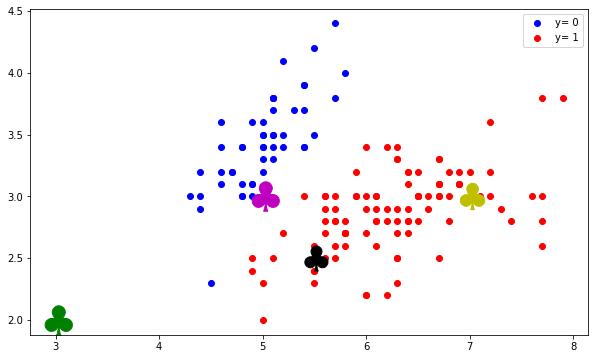

In [126]:
#vérification visuelle

#visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='y= 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='y= 1')

s = np.random.rand(*Xnew[:, 0].shape) * 800 + 500
print(s.shape)
Color='kygm' #noir jaune vert magneta
for i in range(Xnew.shape[0]):
    plt.scatter(Xnew[i, 0], Xnew[i, 1],s[i], color=Color[i],marker=r'$\clubsuit$',)
plt.legend();

# Rappel de votre cours de BD
## Pandas : un moyen efficace pour lire et manipuler des données

In [127]:
 # comme n'importe quelle librarire, il faut commencer par la charger à l'aide de la commande import
import pandas
# maintenat que c'est fait on peut utiliser son contenu
# par exemple :vérifier la version installée sur votre machine 
pandas.__version__

'1.4.3'

In [128]:
# et si on lui donne un nom pour faciliter les appels
import pandas as pd
pd.__version__

'1.4.3'

## L’objet DataFrame

La DataFrame est un objet bi-dimentionnel avec des colonnes de types potentiellement différents. 
On peut voir la DataFrame comme une feuille Exce ou une table SQL.

In [129]:
# Lecture d'un fichier de données et le récupérer sous forme de dataframe sous le nom df 
df = pd.read_csv("Prix_Appartements.csv") # à partir d'un csv 
df.head(5)

age  distance métro  magasins proches  prix au m2
0  32.0        84.87882                10        37.9
1  19.5       306.59470                 9        42.2
2  13.3       561.98450                 5        47.3
3  13.3       561.98450                 5        54.8
4   5.0       390.56840                 5        43.1

In [130]:
 ## On peut afficher les dimensions (nombre de lignes et de colonnes) ## avec l'attibut shape (comme avec numpy)
print('la taille :',df.shape) ## (nb lignes, nb colonnes) print('*'*40)
print('Avec :',df.shape[0],' lignes') ## (nb lignes, nb colonnes) print('*'*40)
print('Avec :',df.shape[1],' colonnes') ## (nb lignes, nb colonnes) print('*'*40)

la taille : (414, 4)
Avec : 414  lignes
Avec : 4  colonnes


In [131]:
 ## La commande df.head(n) permet d'afficher uniquement les n premiers éléments # car la taille de la dataframe est grande avec 4622 lignes
df.head(6) # les 6 premières lignes de 0 à 5 = 6-1

age  distance métro  magasins proches  prix au m2
0  32.0        84.87882                10        37.9
1  19.5       306.59470                 9        42.2
2  13.3       561.98450                 5        47.3
3  13.3       561.98450                 5        54.8
4   5.0       390.56840                 5        43.1
5   7.1      2175.03000                 3        32.1

In [132]:
## De même df.tail(n) affiche les n=3 derniers éléments
df.tail(3)

age  distance métro  magasins proches  prix au m2
411  18.8       390.96960                 7        40.6
412   8.1       104.81010                 5        52.5
413   6.5        90.45606                 9        63.9

In [133]:
# La commande describe() est très utile. Elle permet d'obtenir, en une seule commande,
# des statistiques des colonnes (UNIQUEMENT pour les colonnes de type numérique)

df.describe()

age  distance métro  magasins proches  prix au m2
count  414.000000      414.000000        414.000000  414.000000
mean    17.712560     1083.885689          4.094203   37.980193
std     11.392485     1262.109595          2.945562   13.606488
min      0.000000       23.382840          0.000000    7.600000
25%      9.025000      289.324800          1.000000   27.700000
50%     16.100000      492.231300          4.000000   38.450000
75%     28.150000     1454.279000          6.000000   46.600000
max     43.800000     6488.021000         10.000000  117.500000

### Exercice  : Use case

## dataset dans le fichier Prix_Appartements.csv


1- Avec la commande pd.read_csv ouvrir le fichier csv dans une dataframe  df_1.

2- Afficher les 7 premières lignes. 

3- Afficher les noms des colonnes. 

4- Créer une nouvelle colonne dans la dataframe ne contenant que l'âge et le prix.

5- Affichier les lignes d'index impair.

6- En utilisant la colonne prix, calculer le prix moyen $p_m$, la médiane $k_m$ et l'écart-type $\sigma_m$. 

7- Afficher les lignes dont le prix est supérieur au prix moyen $p_m$.

8- Choisir deux colonnes qui représentront les variables $X$ et $Y$. Par exemple la distance au métro le plus proche et le prix au mètre carré. Pouvez les récupérer dans deux tableaux numpy.  

9- Appliquer une régression linéaire pour vérifier la corrélation entre $X$ et $Y$ à l'aide des graphiques comme dans l'exircice du TD2.

10- Quelle variable (colonne) est la plus corrélée avec le prix ? 

11- Pour éviter à ce que les grandes valeurs dominent les petites, on peut normaliser en divisant chaque colonne par le maximum en valeur absolue. Reprendre la question 10 avec des valeurs normalisées. 

11- Vérifier la corrélation entre le prix et deux voire plusieurs colonnes. Conclure. 